In [1]:


import pandas as pd
df=pd.read_csv("diabtes.csv")
print(df.shape)

(768, 9)


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# print no of missing values in each column
print(df.isnull().sum())
# print the statistical measures of the data
print(df.describe())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

# real world analysis

Glucose: max=300 min=40
​
BloodPressure (diastolic): max=120 min=50
​
SkinThickness: max=40 min=5
​
Insulin: max=200 min=2
​
BMI: max=70 min=10
​
DiabetesPedigreeFunction: max=2.42 min=0.08




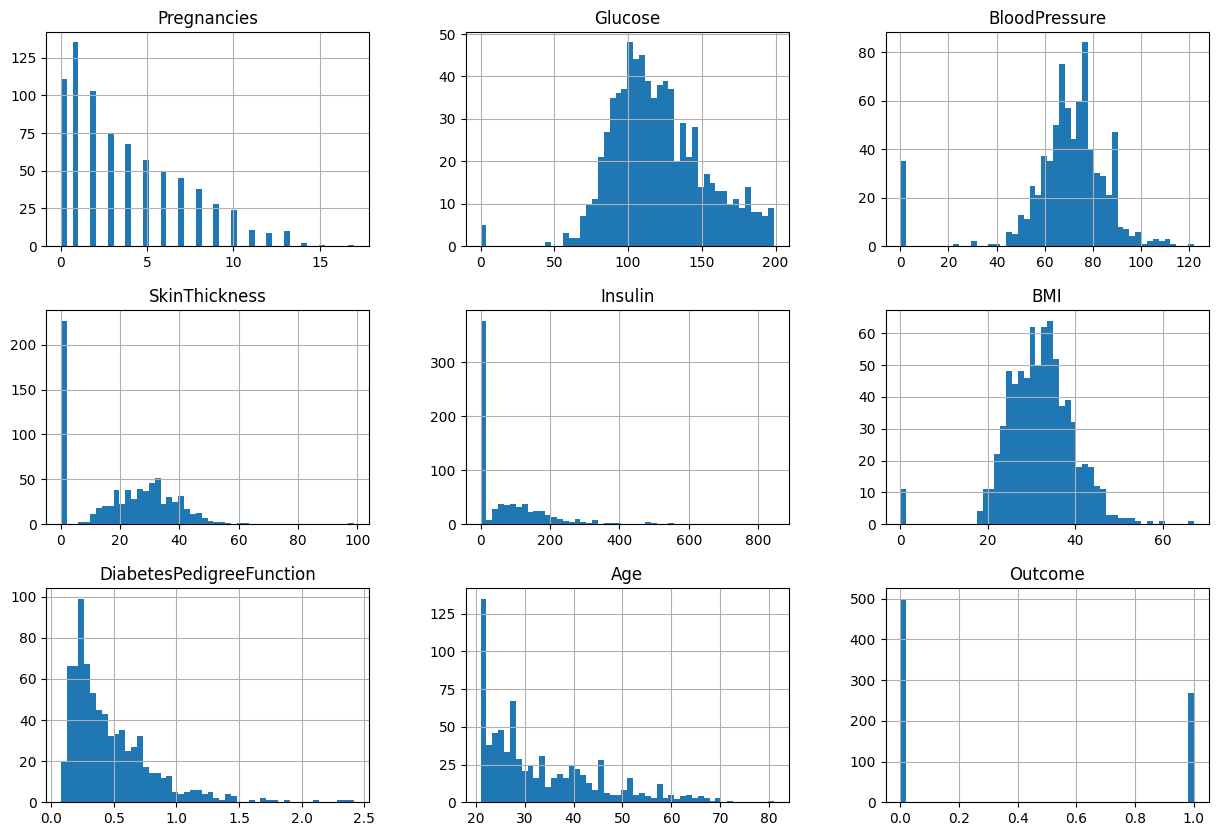

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()

## we dont get "0" value in the insulin as an oulier because of higher frequency in distribution 
## so if we remove index their may be a lot lost data so we replace that zeros with median values


In [6]:
#replace '0' in insulin in df with median values
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"][df["Insulin"] != 0].median())

In [7]:
# Define the acceptable ranges based on the analysis
ranges_to_check = {
    'Glucose': (40, 300),
    'BloodPressure': (50, 120),
    'SkinThickness': (5, 40),
    'Insulin': (2, 200),
    'BMI': (10, 70),
    'DiabetesPedigreeFunction': (0.08, 2.42)
}

# Replace out-of-range values with median
for col, (min_val, max_val) in ranges_to_check.items():
    median_val = df[col].median()
    df[col] = df[col].apply(lambda x: median_val if (x < min_val or x > max_val) else x)



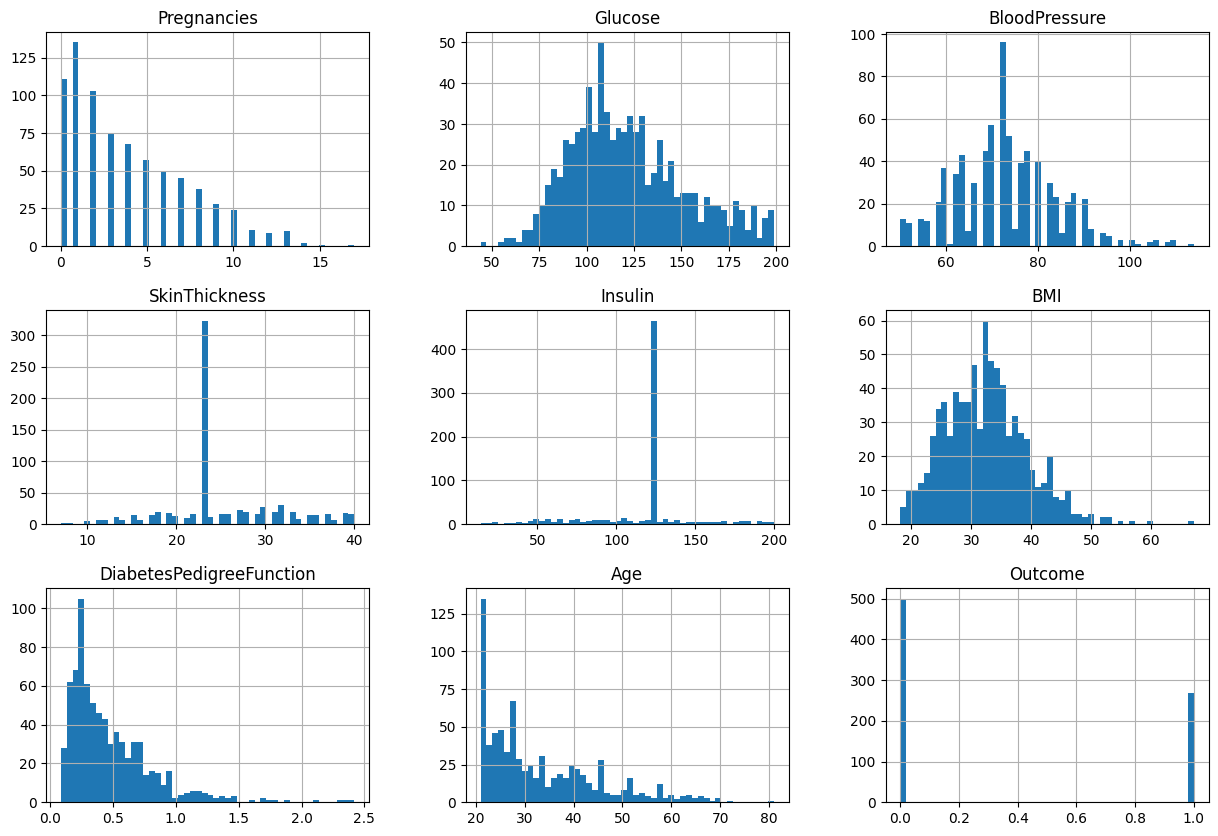

In [8]:
#after modifyning valus form real world data is 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()

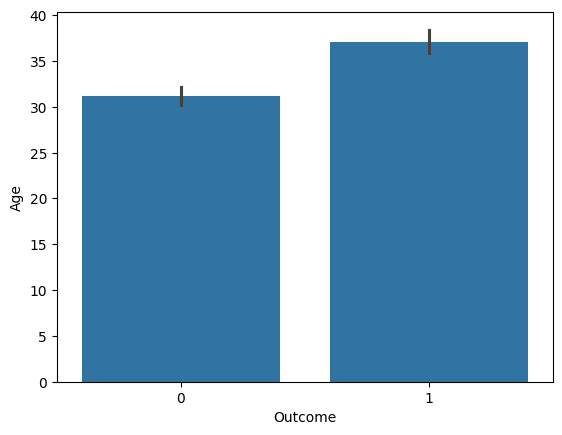

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df["Outcome"],y=df["Age"])
plt.show()


In [10]:
#group by outcome and calculate mean for each group
print(df['Age'].groupby(df['Outcome']).std())
print(df['Age'].groupby(df['Outcome']).count())






Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64
Outcome
0    500
1    268
Name: Age, dtype: int64


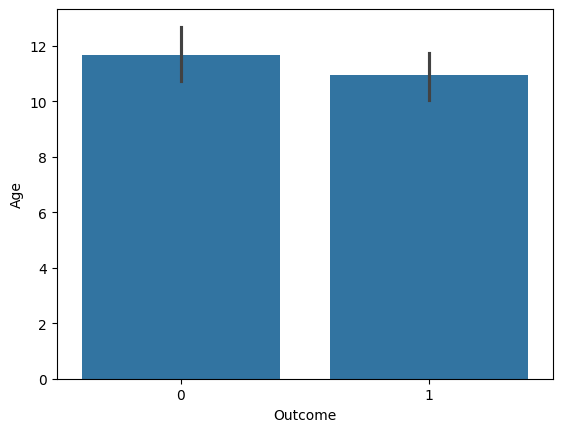

In [11]:
sns.barplot(x=df["Outcome"],y=df["Age"],estimator="std")
plt.show()


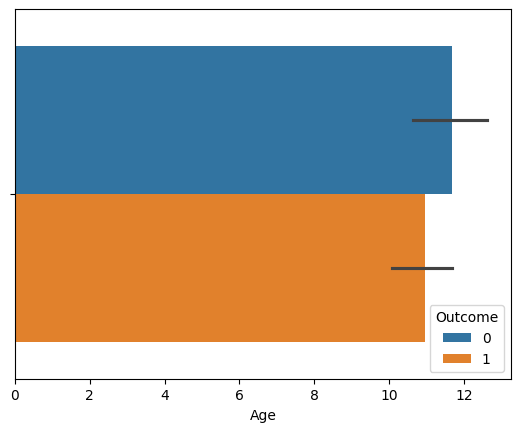

In [12]:
sns.barplot(x=df['Age'],hue=df['Outcome'],estimator='std')
plt.show()


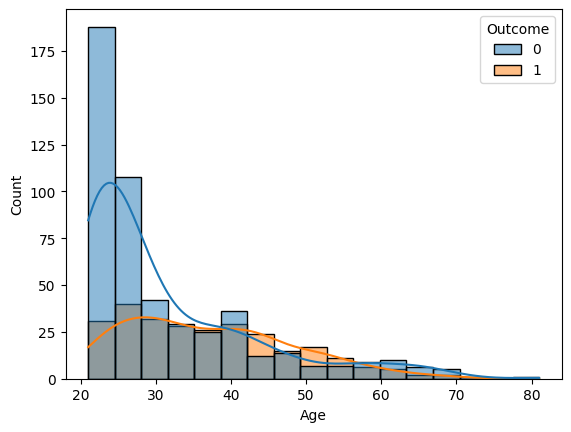

In [13]:
sns.histplot(data=df,x="Age",hue="Outcome",kde=True)
plt.show()

In [14]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
#same plots for bmi and outcome
print(df['BMI'].groupby(df['Outcome']).std())
print(df['BMI'].groupby(df['Outcome']).count())


Outcome
0    6.503074
1    6.596704
Name: BMI, dtype: float64
Outcome
0    500
1    268
Name: BMI, dtype: int64


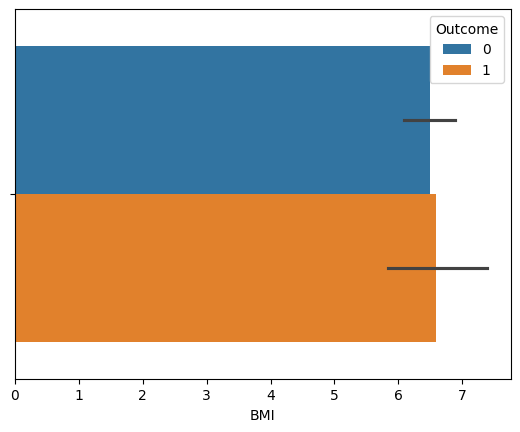

In [16]:
sns.barplot(x=df['BMI'],hue=df['Outcome'],estimator='std')
plt.show()

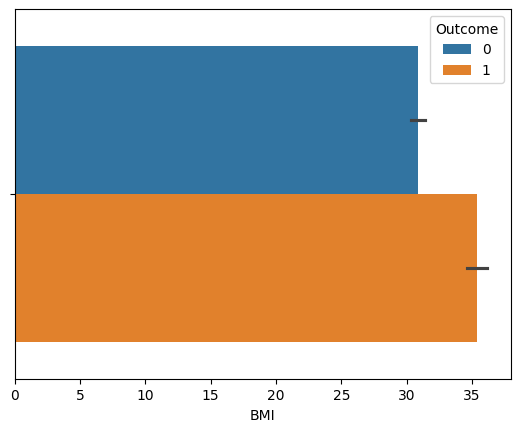

In [17]:
sns.barplot(x=df['BMI'],hue=df['Outcome'],estimator='mean')
plt.show()

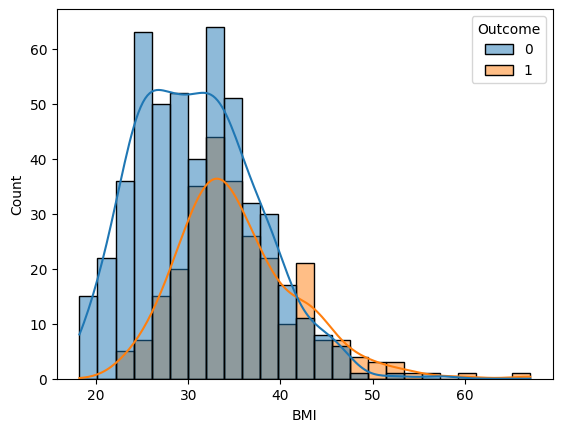

In [18]:
sns.histplot(data=df,x="BMI",hue="Outcome",kde=True)
plt.show()

In [19]:
die_age=df['Age'] [df['Outcome']==1]
nondie_age=df['Age'] [df['Outcome']==0]
#HO: Both data are same
#H1: Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_age, nondie_age)
alpha = 0.05
if p<alpha:
    print('Reject HO')
else:
    print('Accept HO')

Reject HO


In [20]:
die_bmi=df['BMI'] [df['Outcome']==1]
nondie_bmi=df['BMI'] [df['Outcome']==0]
#HO: Both data are same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_bmi, nondie_bmi)
alpha = 0.05
if p<alpha:
    print('Reject HO')
else:
    print('Accept HO')

Reject HO


In [21]:
die_bp=df['BloodPressure'] [df['Outcome']==1]
nondie_bp=df['BloodPressure'] [df['Outcome']==0]
#HO: Both data are same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_bp, nondie_bp)
alpha = 0.05
if p<alpha:
    print('Reject HO')
else:
    print('Accept HO')

Reject HO


### we are rejecting the both data are same so we can conclude that both are diffet with repsect to oucome that is o and 1 as outcome so this column has relationship with target varibale(outcome)

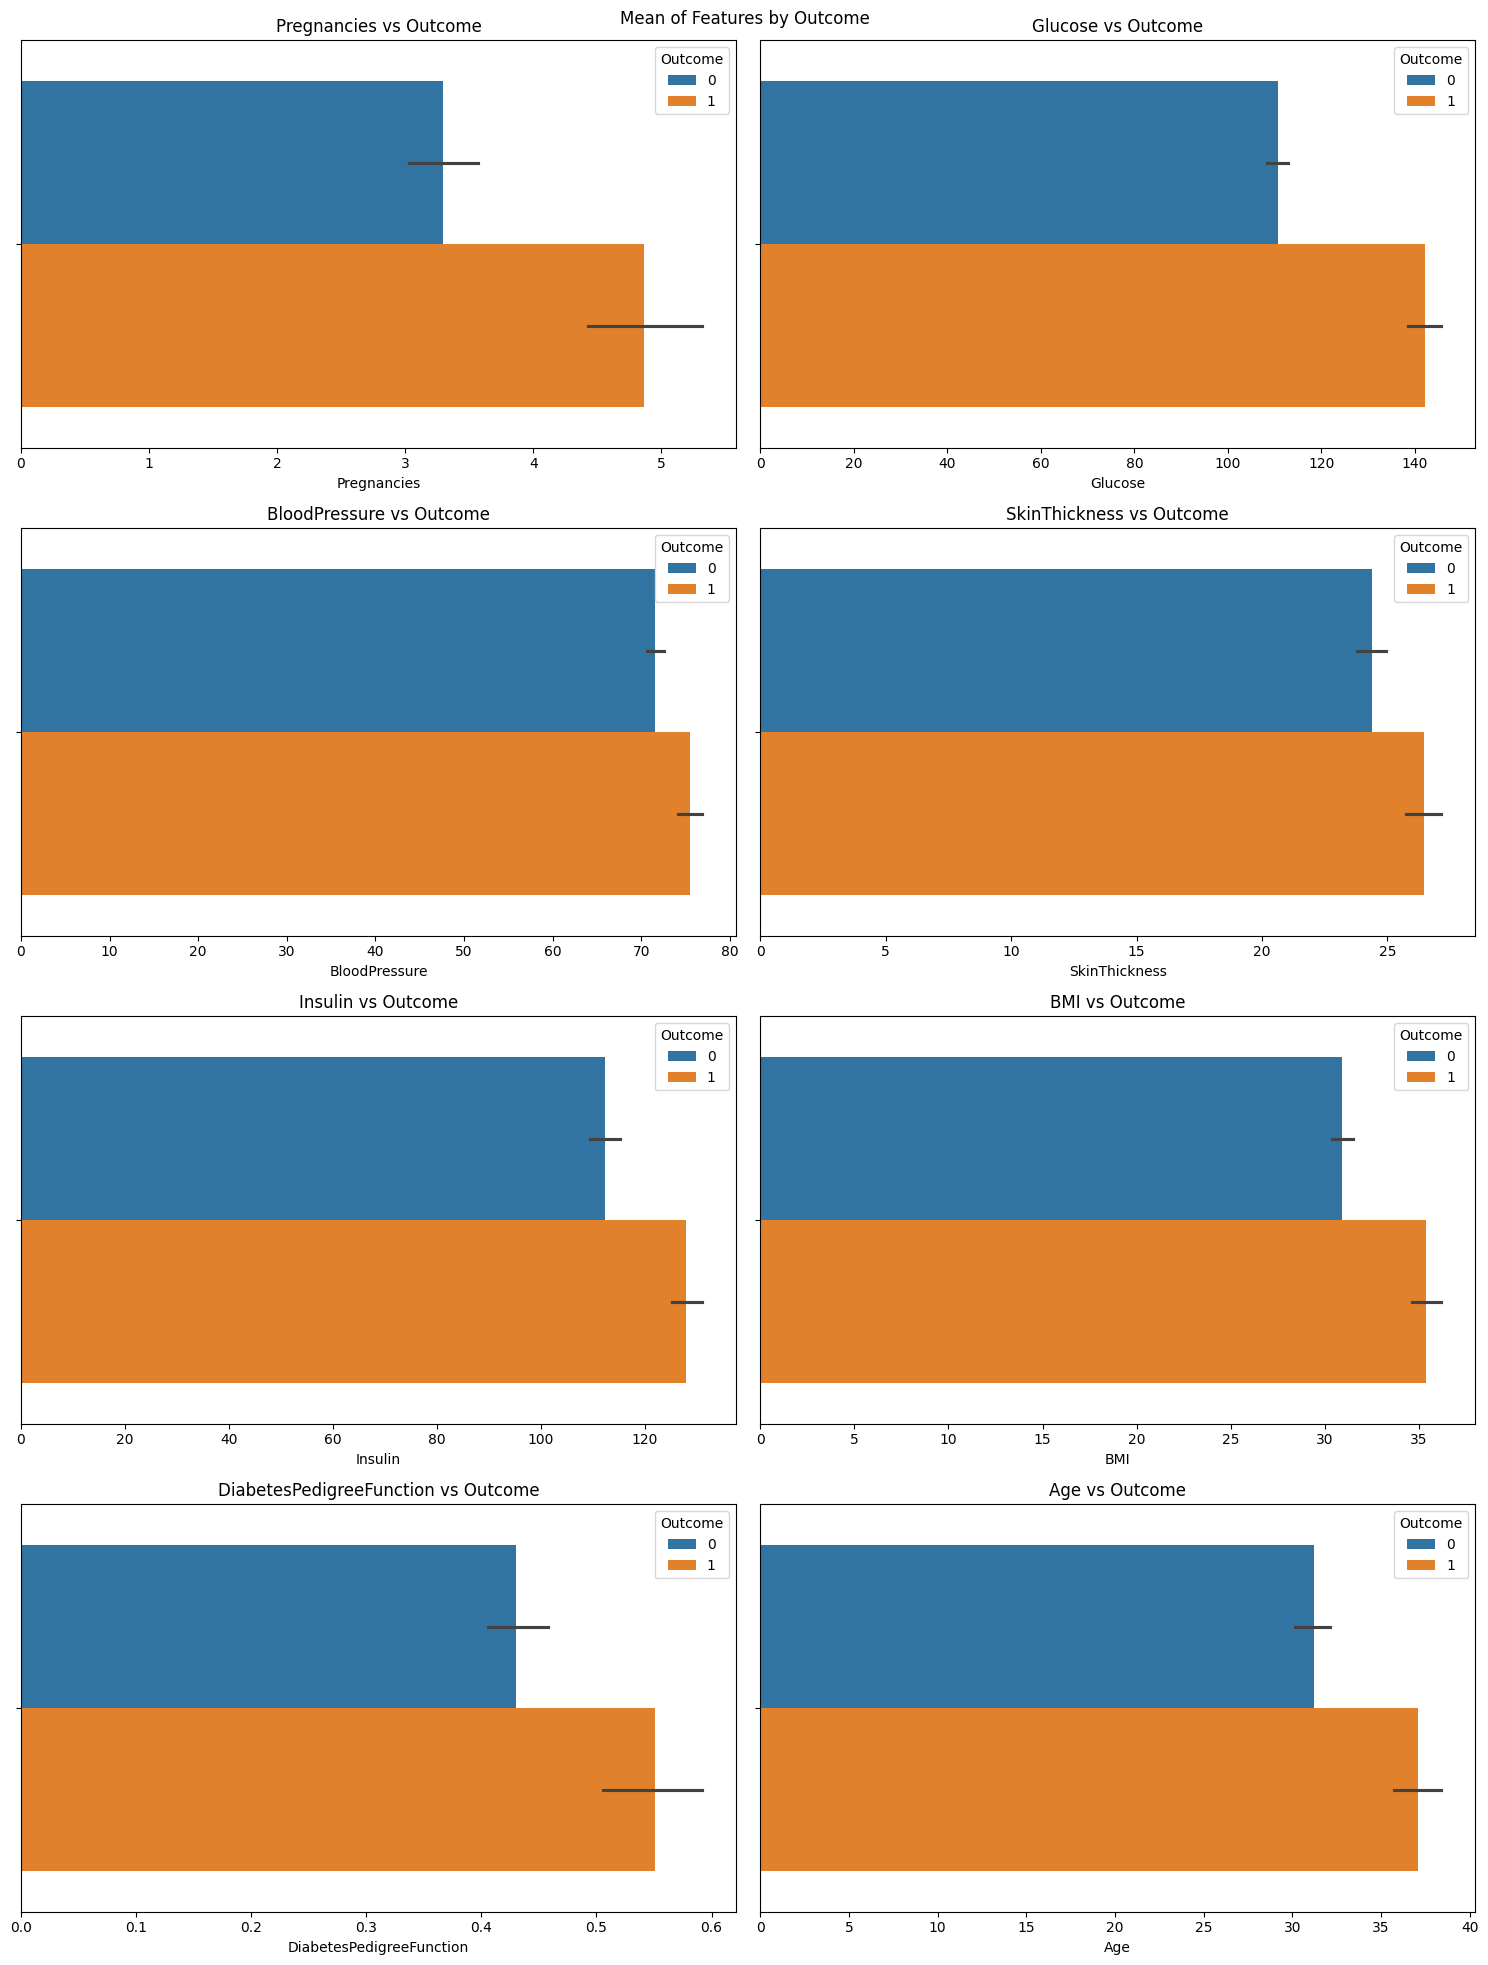

In [22]:
import seaborn as sns
#box plot for all columns against outcome
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'Outcome':
        plt.subplot(4, 2, i)
        sns.barplot(x=df[col], hue=df["Outcome"], estimator='mean')
        plt.title(f'{col} vs Outcome')
        i += 1

plt.suptitle('Mean of Features by Outcome')
plt.tight_layout()
plt.show()



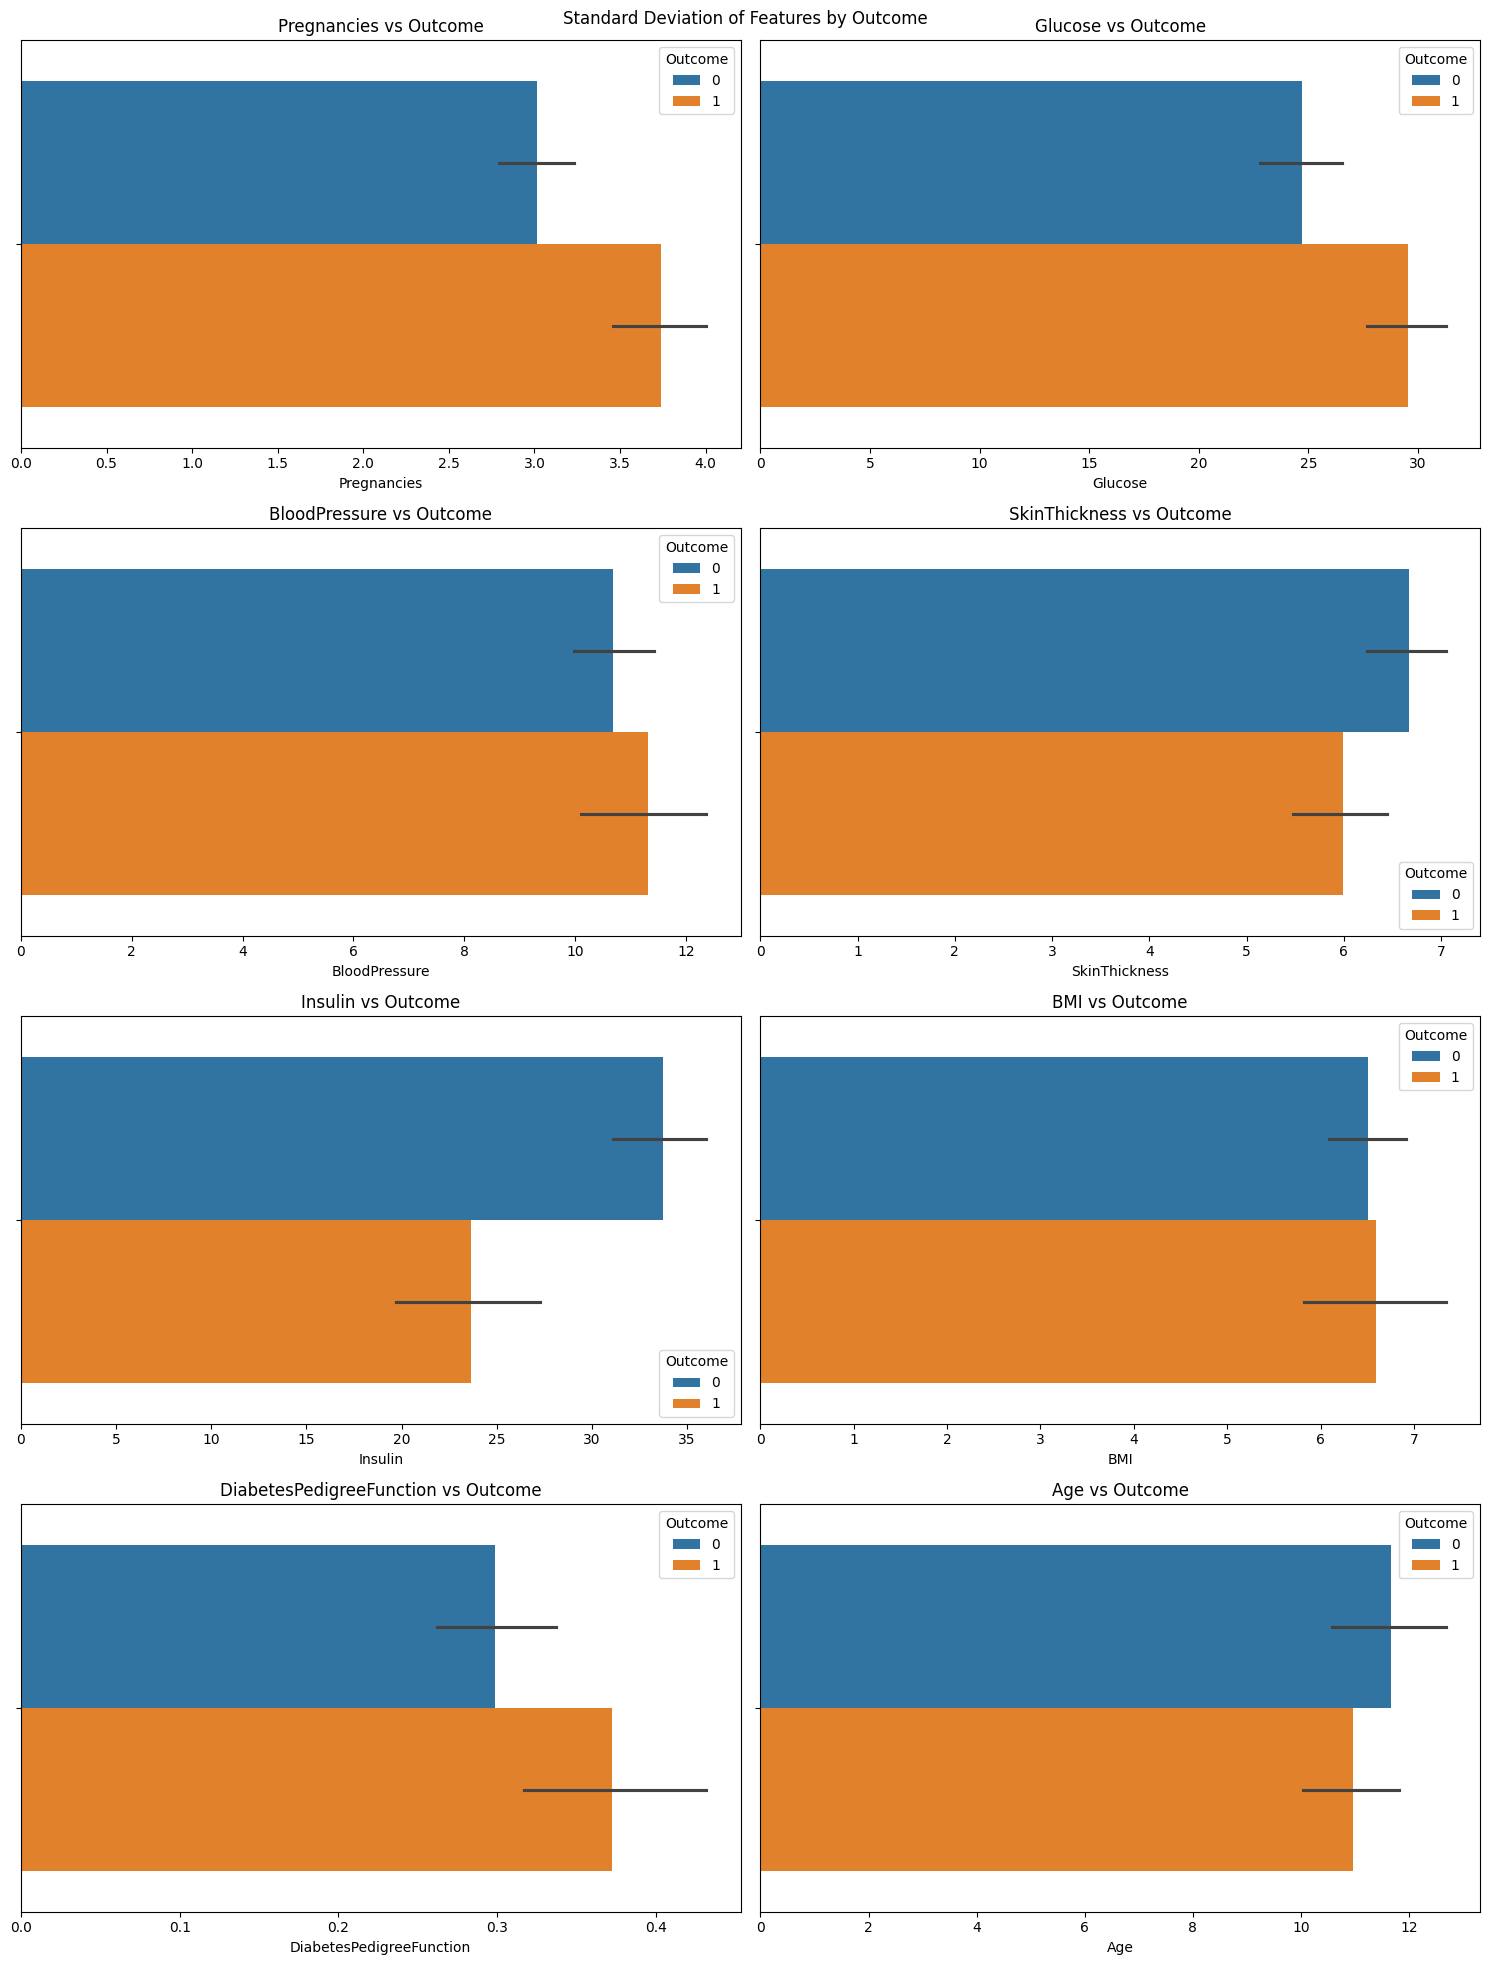

In [23]:
import seaborn as sns
#box plot for all columns against outcome
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'Outcome':
        plt.subplot(4, 2, i)
        sns.barplot(x=df[col], hue=df["Outcome"], estimator='std')
        plt.title(f'{col} vs Outcome')
        i += 1

plt.suptitle('Standard Deviation of Features by Outcome')
plt.tight_layout()
plt.show()

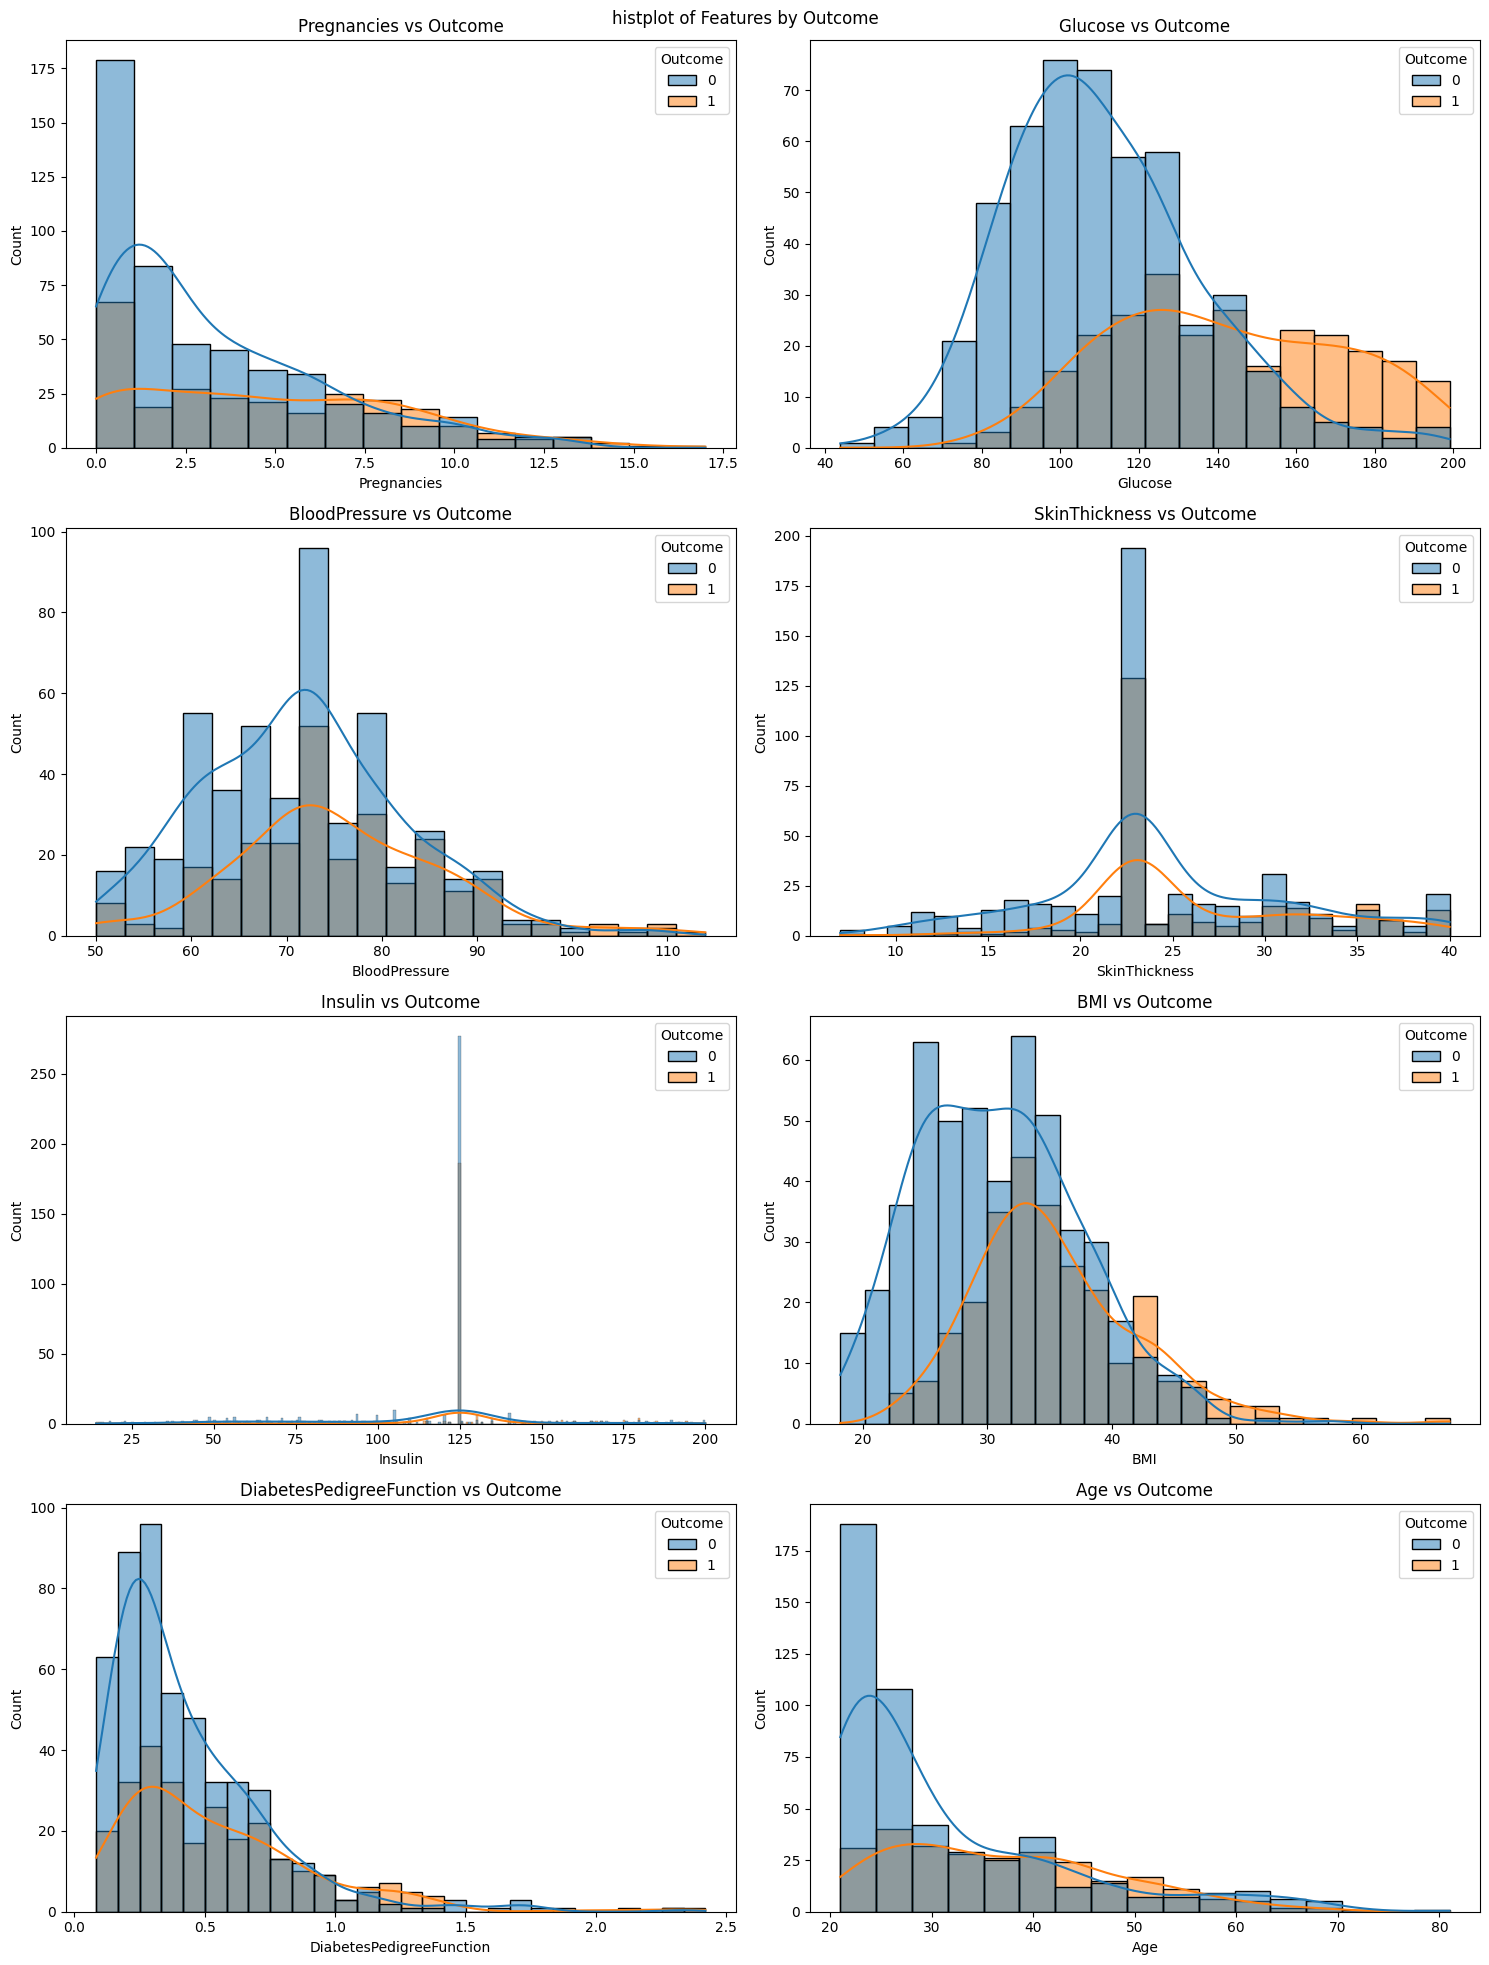

In [24]:
import seaborn as sns
#box plot for all columns against outcome
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'Outcome':
        plt.subplot(4, 2, i)
        sns.histplot(x=df[col], hue=df["Outcome"],kde=True)
        plt.title(f'{col} vs Outcome')
        i += 1

plt.suptitle('histplot of Features by Outcome')
plt.tight_layout()
plt.show()

In [25]:
for col in df.columns:
    if col != 'Outcome':
        die_values = df[col][df['Outcome'] == 1]
        nondie_values = df[col][df['Outcome'] == 0]
        stat, p = ttest_ind(die_values, nondie_values)
        alpha = 0.05
        if p < alpha:
            print(f'For {col}: Reject HO - Significant difference between groups')
        else:
            print(f'For {col}: Accept HO - No significant difference between groups')

For Pregnancies: Reject HO - Significant difference between groups
For Glucose: Reject HO - Significant difference between groups
For BloodPressure: Reject HO - Significant difference between groups
For SkinThickness: Reject HO - Significant difference between groups
For Insulin: Reject HO - Significant difference between groups
For BMI: Reject HO - Significant difference between groups
For DiabetesPedigreeFunction: Reject HO - Significant difference between groups
For Age: Reject HO - Significant difference between groups


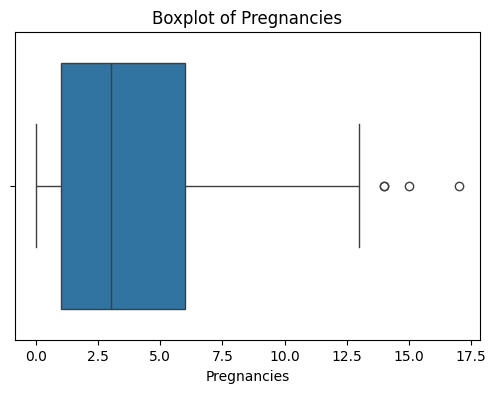

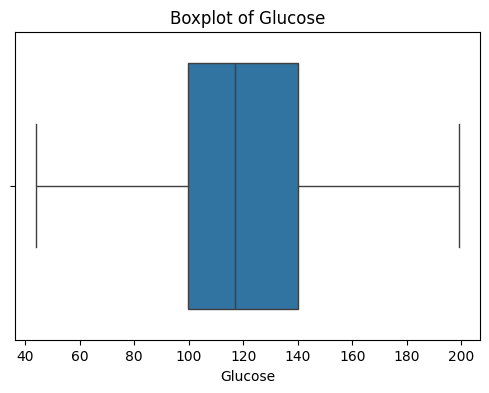

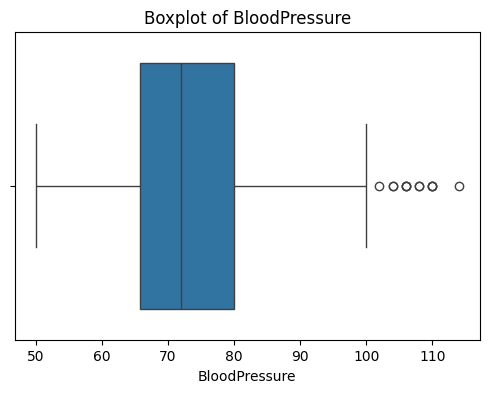

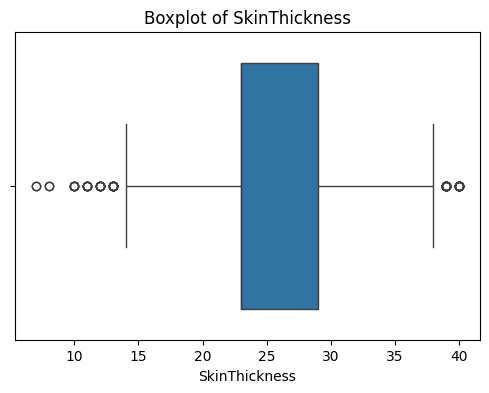

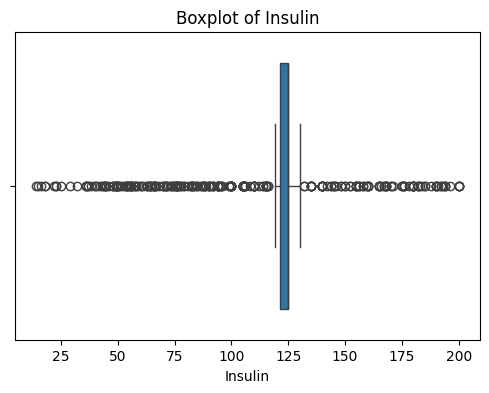

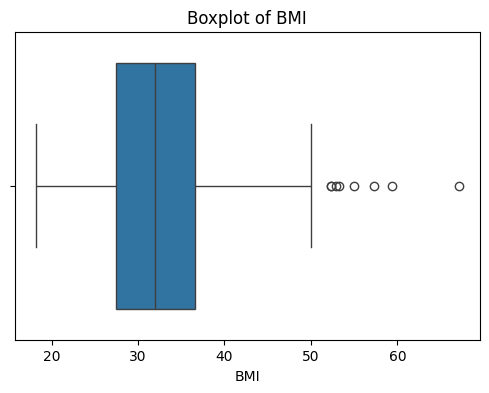

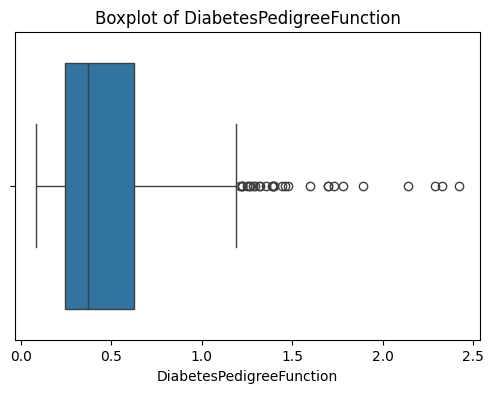

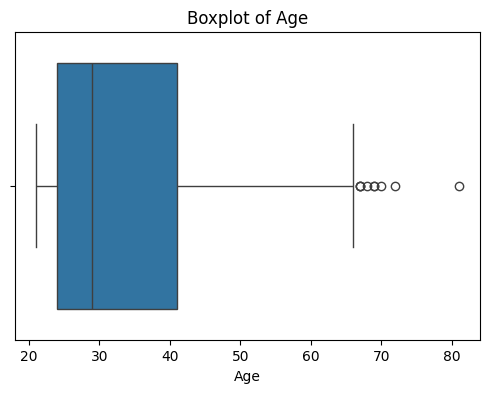

In [26]:
#checking outliers for every column

for col in df.columns:
    if col != 'Outcome':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [27]:
#removing only outliers
import numpy as np
outlier_idx = set()
for column in df.select_dtypes(include=[np.number]).columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_idx.update(df.index[mask])

df = df.drop(index=list(outlier_idx))
print(df.shape)

(421, 9)


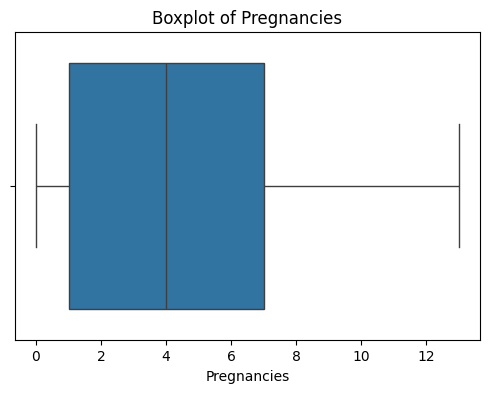

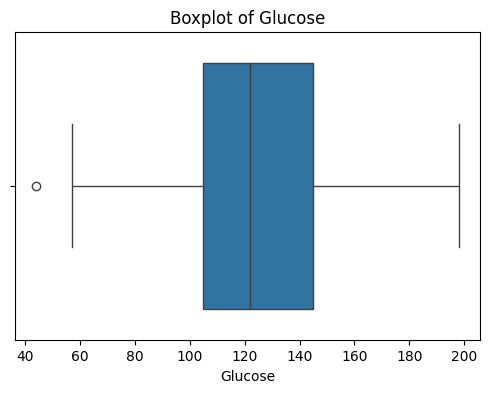

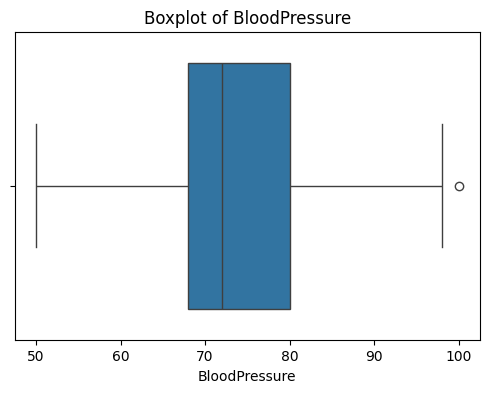

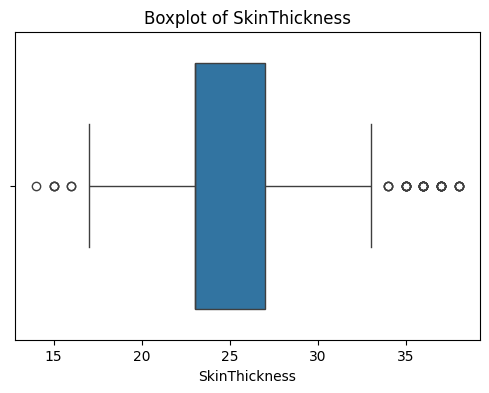

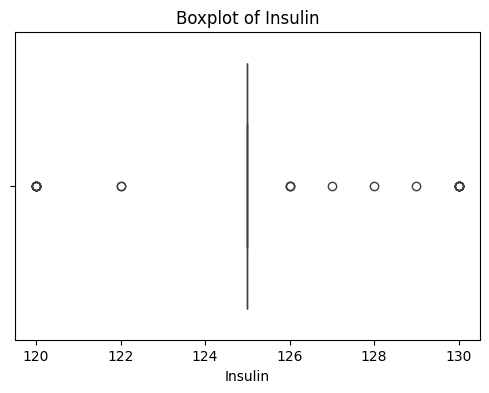

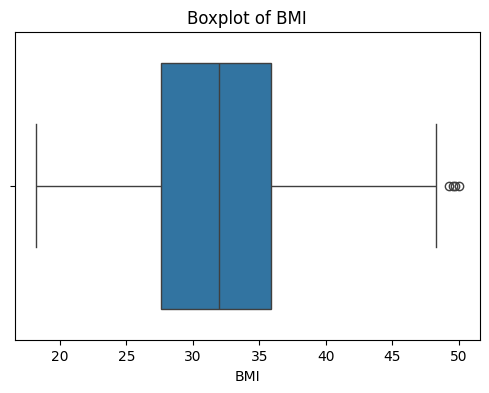

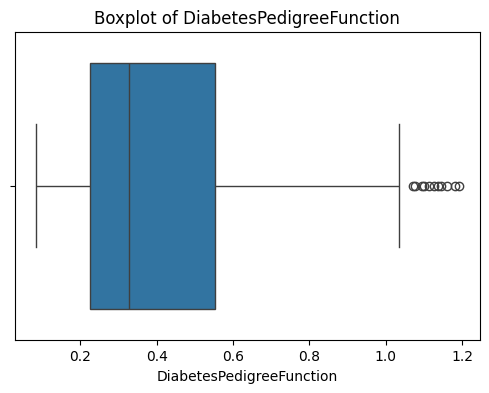

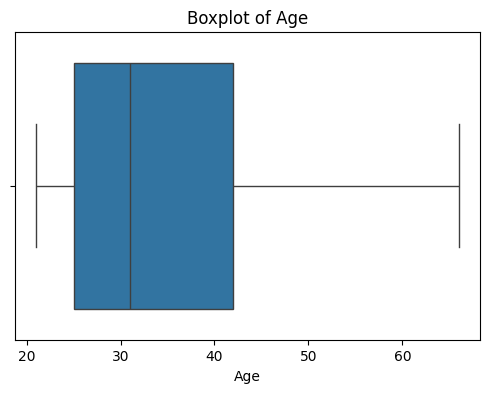

In [28]:
#checking outliers for every column

for col in df.columns:
    if col != 'Outcome':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,23.0,125.0,23.3,0.672,32,1
5,5,116.0,74.0,23.0,125.0,25.6,0.201,30,0
7,10,115.0,72.0,23.0,125.0,35.3,0.134,29,0


In [30]:
#mimmax sclaer except pregnacies and outcome
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = [col for col in df.columns if col not in ['Pregnancies', 'Outcome']]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.675325,0.44,0.875,0.5,0.484277,0.490515,0.644444,1
1,1,0.266234,0.32,0.625,0.5,0.264151,0.241192,0.222222,0
2,8,0.902597,0.28,0.375,0.5,0.160377,0.531165,0.244444,1
5,5,0.467532,0.48,0.375,0.5,0.232704,0.105691,0.200000,0
7,10,0.461039,0.44,0.375,0.5,0.537736,0.045167,0.177778,0


In [32]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


In [47]:
#score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))


0.7648809523809523
0.7529411764705882


In [48]:
print(confusion_matrix(y_test,y_test_pred))

[[44  4]
 [17 20]]


In [49]:
print(precision_score(y_test,y_test_pred))

0.8333333333333334


In [50]:
print(recall_score(y_test,y_test_pred))


0.5405405405405406


In [51]:
print(f1_score(y_test,y_test_pred))

0.6557377049180327


In [52]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        48
           1       0.83      0.54      0.66        37

    accuracy                           0.75        85
   macro avg       0.78      0.73      0.73        85
weighted avg       0.77      0.75      0.74        85



In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
print(X_test.shape)
y_prob = model.predict_proba(X_test) [:, 1]
print(y_prob.shape)
print(y_prob)


(85, 8)
(85,)
[0.09631131 0.37459381 0.39898916 0.16414482 0.14833501 0.68084122
 0.1341474  0.76413963 0.08723552 0.1830103  0.15609035 0.26640945
 0.33964455 0.82710206 0.16178632 0.28337913 0.62397412 0.2595309
 0.4738127  0.63034514 0.30321259 0.18343141 0.24973826 0.85272964
 0.07853984 0.60915847 0.03374871 0.86091513 0.37857524 0.43120898
 0.61509201 0.15392292 0.4976711  0.26924495 0.11454927 0.13016381
 0.10487321 0.38148843 0.55891242 0.28988832 0.4559617  0.24758243
 0.9121719  0.85718832 0.64220811 0.40669598 0.14632643 0.1096991
 0.32726855 0.87163738 0.17410978 0.44136203 0.74473118 0.47756951
 0.26648408 0.38221331 0.09390424 0.26186871 0.32844774 0.13683792
 0.18907324 0.63532287 0.21576484 0.7013338  0.67481594 0.77718507
 0.46415515 0.49378841 0.40847854 0.10583076 0.79453665 0.14586797
 0.62108975 0.09625222 0.55773508 0.08241099 0.37190182 0.13055589
 0.46071283 0.13103329 0.27634616 0.47642453 0.61112534 0.6722615
 0.15014546]


In [60]:
# probability of positive class
fpr, tpr, thresholds=roc_curve(y_test, y_prob)
auc_score=roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)



AUC Score: 0.8006756756756758


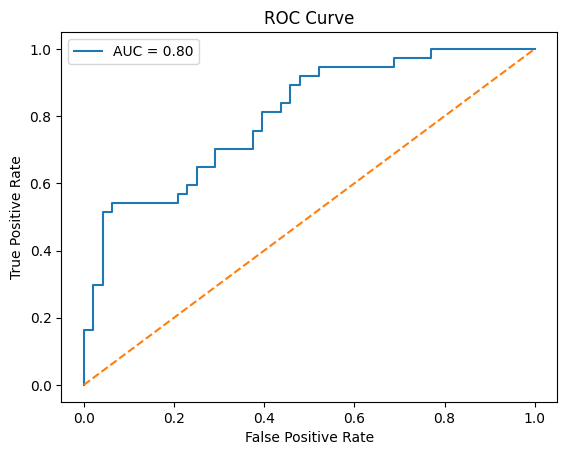

In [62]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--') # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()